# Project 2

I chose to investigate the Titanic data. It looks like a sample of the passengers on the Titanic. The question I'd like to answer through this project is: 

**What factors made people more likely to survive?**

In this analysis, I'll be examining 3 factors:
- Gender
- Age
- Class

I will use Jupyter Notebook, along with the numpy, pandas, and matplotlib python libraries to aid me in analyzing the dataset. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/Users/davidhe/Downloads/UDAND/Project 2/titanic-data.csv")
data.head() #Checking to see if the csv file was read properly
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


After getting a feel for what fields this data contains and what it looks like, I'm ready to check the data types and clean the data, since there are missing values based on what I see above in the last 5 rows of data.

## Cleaning Data
Now, I want to keep only the relevant columns that will help with my analysis, and check to see the data types and missing values in my data.

I think the following can be dropped for the following reason:

- Name - this analysis is objective, the name is irrelevant

- Ticket - it does not provide any sort of pattern, and cannot be calculated into something useful

- Cabin - same as above, and also Pclass and Fare can be good substitutes, with more telling data

- Embarked - unless people who board the ship at different stations tend to behave in a drastically different way, or have much better physique to survive cold ocean water... probably not relevant in this analysis

In [3]:
new_Data = data.drop(['Name','Ticket','Cabin','Embarked'],1)
new_Data.head() # Looks good

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [4]:
new_Data.dtypes # Checking to see if the data types are appropriate. Looks appropriate.

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [5]:
new_Data.isnull().sum() # Looks like Age has missing columns.

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

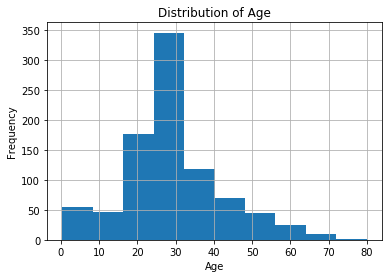

In [16]:
new_Data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

I choose to fill all the NaNs as the median of 'Age'. This should improve potential future calculations done to 'Age', while not drastically affecting the data quality.

In [7]:
new_Data['Age'].fillna(new_Data['Age'].median(), inplace = True)
new_Data.isnull().sum() # No more missing values

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

## Data Exploration and Visualization

In [8]:
new_Data.describe() # Descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### In the movie, I vaguely remember the line "Women and children first!" Think they had a higher survival rate?

#### The Gender Factor

In [9]:
print new_Data.groupby('Sex')['Survived'].mean()

gender_survival = new_Data[new_Data['Survived'] == 1].groupby(['Sex']).size().values
gender_nonsurvival = new_Data[new_Data['Survived'] == 0].groupby(['Sex']).size().values

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [10]:
male_survival_rate = new_Data['Survived'][new_Data['Sex'] == 'male'].mean()
female_survival_rate = new_Data['Survived'][new_Data['Sex'] == 'female'].mean()
gender_survival_rate = [female_survival_rate,male_survival_rate]

print 'Men had a survival rate of ', male_survival_rate 
print 'Women had a survival rate of ', female_survival_rate

Men had a survival rate of  0.188908145581
Women had a survival rate of  0.742038216561


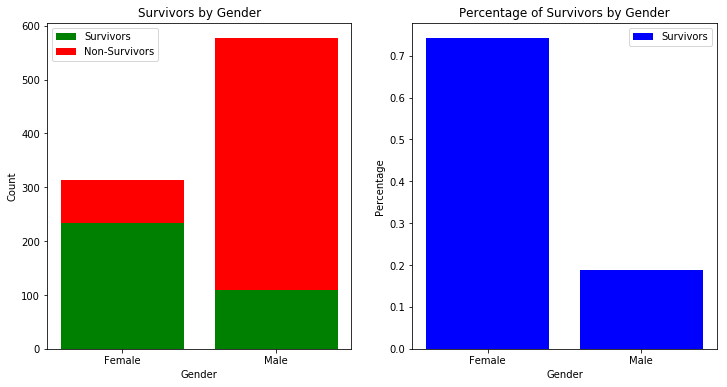

In [11]:
gender = ['Female','Male']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar(range(len(gender_survival)), gender_survival, label = 'Survivors', color='g')
ax1.bar(range(len(gender_nonsurvival)),gender_nonsurvival,label = 'Non-Survivors', bottom=gender_survival, color='r')
plt.sca(ax1)
plt.xticks([0, 1], gender)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.set_title('Survivors by Gender')
plt.legend()

plt.sca(ax2)
ax2.bar(range(len(gender_survival_rate)), gender_survival_rate,label = 'Survivors', color='b')
plt.xticks([0,1], gender)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Percentage')
ax2.set_title('Percentage of Survivors by Gender')
plt.legend()


As I suspected, women had a much higher survival rates (74%) than men (19%). It is also worth noting that there were a lot more male passengers onboard than female passengers.

#### The Age Factor

In [12]:
kid_survival_rate = new_Data['Survived'][new_Data['Age'] < 18].mean()
adult_survival_rate = new_Data['Survived'][new_Data['Age'] >= 18].mean()
age_survival_rate = [kid_survival_rate, adult_survival_rate]
kid_nonsurvival_rate = 1 - kid_survival_rate
adult_nonsurvival_rate = 1 - adult_survival_rate


print 'The survival rate of kids below the age of 18 is', kid_survival_rate
print 'The survival rate of adults is', adult_survival_rate

The survival rate of kids below the age of 18 is 0.53982300885
The survival rate of adults is 0.36118251928


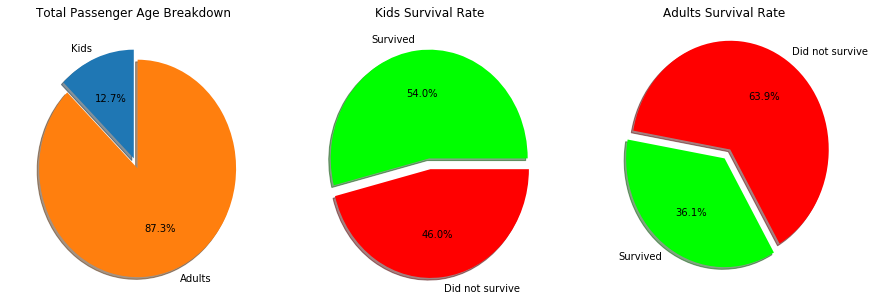

In [13]:
age_count = [len(new_Data[new_Data['Age'] < 18]), len(new_Data[new_Data['Age'] >= 18])]
kid_survival = [kid_survival_rate,kid_nonsurvival_rate]
adult_survival = [adult_survival_rate, adult_nonsurvival_rate]
labels1 = 'Kids', 'Adults'
labels2 = 'Survived', 'Did not survive'
colors = ['lime','red']
explode = (0, 0.1)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.pie(age_count, explode=explode, labels=labels1,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.set_title("Total Passenger Age Breakdown")

ax2.pie(kid_survival,explode=explode,labels=labels2,autopct='%1.1f%%',shadow=True, colors=colors)
ax2.set_title('Kids Survival Rate')

ax3.pie(adult_survival,explode=explode,labels=labels2,autopct='%1.1f%%',shadow=True, startangle=170, colors=colors)
ax3.set_title('Adults Survival Rate')

Judging by the pie charts, there were fewer kids onboard than adults, but kids are more likely to survive than adults (54% vs 38%)

#### The Class Factor

In [14]:
class1_survival_rate = new_Data['Survived'][new_Data['Pclass'] == 1].mean()
class2_survival_rate = new_Data['Survived'][new_Data['Pclass'] == 2].mean()
class3_survival_rate = new_Data['Survived'][new_Data['Pclass'] == 3].mean()
class1_survival = [class1_survival_rate, 1 - class1_survival_rate]
class2_survival = [class2_survival_rate, 1 - class2_survival_rate]
class3_survival = [class3_survival_rate, 1 - class3_survival_rate]

print 'The survival rate of first class passengers is', class1_survival_rate
print 'The survival rate of second class passengers is', class2_survival_rate
print 'The survival rate of third class passengers is', class3_survival_rate

The survival rate of first class passengers is 0.62962962963
The survival rate of second class passengers is 0.472826086957
The survival rate of third class passengers is 0.242362525458


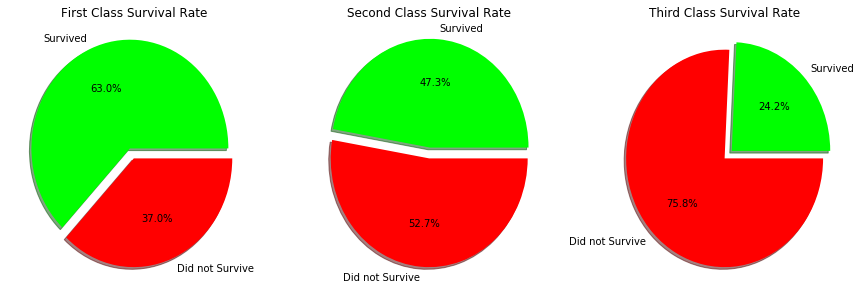

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
labels = ['Survived','Did not Survive']
colors = ['lime','red']
explode = [0.1, 0]

ax1.pie(class1_survival, explode=explode, shadow=True,labels=labels,autopct='%1.1f%%', colors = colors)
ax2.pie(class2_survival, explode=explode, shadow=True,labels=labels,autopct='%1.1f%%', colors = colors)
ax3.pie(class3_survival, explode=explode, shadow=True,labels=labels,autopct='%1.1f%%', colors = colors)
ax1.set_title('First Class Survival Rate')
ax2.set_title('Second Class Survival Rate')
ax3.set_title('Third Class Survival Rate')

Based on the pie charts, it seems first class passengers have the best chance for survival, second class passengers having the second best, while third class passengers have the worst chance. This is expected - paying more equates to better positioning on the ship, which would mean faster time to get to the lifeboats.

## Conclusion

### Limitations
In conclusion, I'd like to state some limitations of this dataset: 1) missing data and 2) only a sample of the actual data.

Missing data reduce the representativeness of the sample, and can reduce the effectiveness of the analysis done to infer attributes and relationships amongst the population. Therefore, during the analysis, I decided to clean the missing data by imputing the variable Age's missing values as the median of all known ages.

The imputation I did could have introduced bias to the distribution and variance, as well as statistical testing and assumptions. Furthermore, in the case of heteroskedasticity in the data, imputing missing values as the median would actually hurt more than help if there were severe outliers in the data. Depending on the nature of the missing values, there may be better imputation methods. In the case of the Age values being "missing at random", perhaps it is better to do multiple imputations, based on the expectation-maximization algorithm, or full information maximum likelihood estimation.

### Other variables to consider
In order to make better predictions, I think the following variables should have been introduced and would be interesting to analyze.

- **distance to lifeboat**: did it matter if the people were close to the lifeboats and aboard them first? Were first class passengers naturally closer to the lifeboats, therefore supporting the conclusion that 1st class passengers had better survival rates than passengers in other classes? For the passengers of third class that survived, did they survive because they were closer to the lifeboats than the third class passengers who did not survived?
- **passenger or crew**: were crews more likely to survive, since they knew the layout of the ship and emergency procedures in the case of a disaster? Or did they put the passengers' lives before their own?

### Final note

To summarize, the factors that made people more likely to survive are:
- Gender
- Age
- Class

Based on the findings of this analysis, female passengers were much more likely to survive than their male counterparts. Children below the age of 18 have noticeably higher survival rate than adults. Finally, first class passengers are much more likely to survive than second or third class passengers. These findings make total sense, because at that point in time, women and children came first, and money buys safety.

I'll be likely to revisit this project once I'm more familiar with Python and Regression techniques, so I can find the factor(s) that have the most weight on the survival of any given passenger.


References:

https://www.quora.com/How-do-you-handle-missing-data-statistics-What-imputation-techniques-do-you-recommend-or-follow#!n=18

https://en.wikipedia.org/wiki/Missing_data#Imputation

http://stats.stackexchange.com/questions/133272/how-bad-can-heteroscedasticity-be-before-causing-problems

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation

https://www.stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

https://www.matplotlib.org/1.3.0/examples/pie_and_polar_charts/pie_demo_features.html